<img style="float:left" width="70%" src="../../documentacion/imagenes/escudo_COLOR_1L_DCHA.png">
<img style="float:right" width="10%" src="../../documentacion/imagenes/PythonLogo.svg">
<br style="clear:both;">


<h2 style="display: inline-block; padding: 4mm; padding-left: 2em; background-color: navy; line-height: 1.3em; color: white; border-radius: 10px;">6. Preprocessing</h2>


 
## Estudiante:

- Jose Luis Perez Gomez

In [15]:
%run 3.Importaciones.ipynb
%run 4.Variables_Clases.ipynb

In [16]:
display(HTML(html_h4('Realizo la importacion a un Dataframe de los datos del csv aportado para el TFG datosEEGTotal.csv: ','blue')))
datosEEGTotal_csv = pd.read_csv('../datos/datosEEGTotal.csv', sep=';')

In [17]:
display(HTML(html_h4('Voy a rellenar los datos missing que se observaron en la fase de Carga de datos de Key con la palabra Nothing  ', 'black')))
datosEEGTotal_csv_relleno = datosEEGTotal_csv.fillna("Nothing")
display(HTML(html_h5('Imprimo la info para revisar que no falte ningún dato, ahora no hay ningun dato missing', 'blue')))
datosEEGTotal_csv_relleno.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 726 entries, 0 to 725
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Timestamp   726 non-null    int64 
 1   Attention   726 non-null    int64 
 2   Meditation  726 non-null    int64 
 3   Delta       726 non-null    int64 
 4   Theta       726 non-null    int64 
 5   LowAlpha    726 non-null    int64 
 6   HighAlpha   726 non-null    int64 
 7   LowBeta     726 non-null    int64 
 8   HighBeta    726 non-null    int64 
 9   LowGamma    726 non-null    int64 
 10  HighGamma   726 non-null    int64 
 11  Signal      726 non-null    int64 
 12  Key         726 non-null    object
dtypes: int64(12), object(1)
memory usage: 73.9+ KB


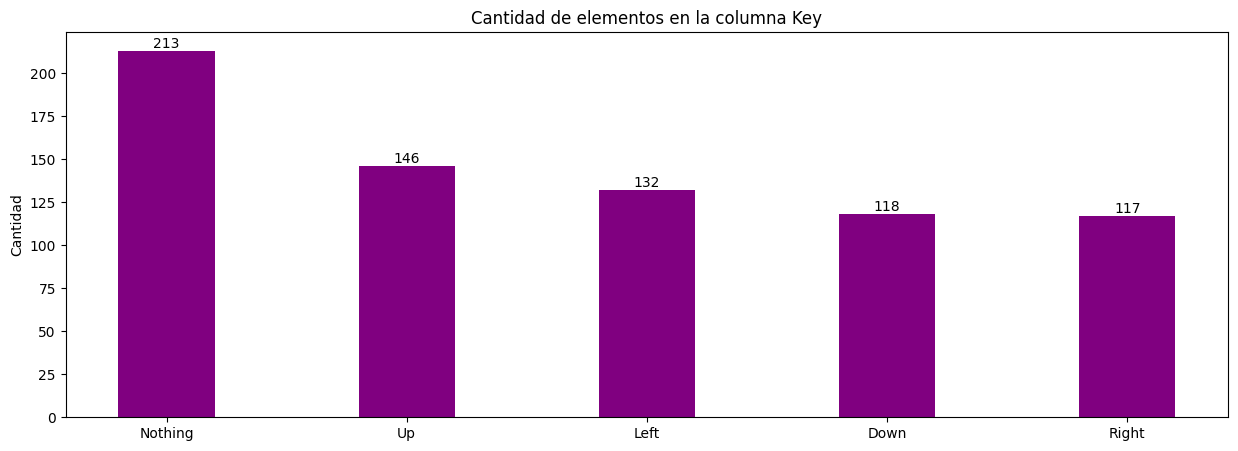

In [18]:
display(HTML(html_h4('Como se identifico en la fase de Carga de Datos, voy a modificar los datos de Key de LButton a Left  ', 'black')))

datosEEGTotal_relleno = datosEEGTotal_csv_relleno.replace({"LButton": 'Left'})

display(HTML(html_h5('Imprimo el grafico de barras para ver como estan de balanceados ahora los datos en la columna target= Key', 'blue')))

# creo la figura 
fig = plt.figure(figsize = (15, 5))
 
# calculo la cantidad de datos de cada elemento en la columna Key
counts = datosEEGTotal_relleno['Key'].value_counts()

# creo el el barplot
plt.bar(counts.index, counts.values, color ='purple', width = 0.4)

# se muestra por cada dato el total de cada elemento
for i, count in enumerate(counts.values):
    plt.text(i, count, str(count), ha='center', va='bottom')

# etiquetas para el gráfico
plt.ylabel('Cantidad')
plt.title('Cantidad de elementos en la columna Key')

# Se muestra el gráfico
plt.show()

display(HTML(html_h5('Ahora ya se pueden orservar todos los datos target. Ya no aparece LButton que se ha integrado en Left y Nothing seria no pulsar hacia ninguna direccion del teclado', 'blue')))



In [19]:

display(HTML(html_h4('Elimino columna Signal tal y como se observo en la fase Carga de Datos porque no aporta nada significativo  ', 'black')))

datosEEGTotal_sinsignal = datosEEGTotal_relleno.drop(['Signal'],axis=1)
display(datosEEGTotal_sinsignal.columns)

display(HTML(html_h5('Ya no esta la caracteristica Signal en el conjunto de datos', 'blue')))


Index(['Timestamp', 'Attention', 'Meditation', 'Delta', 'Theta', 'LowAlpha',
       'HighAlpha', 'LowBeta', 'HighBeta', 'LowGamma', 'HighGamma', 'Key'],
      dtype='object')

In [20]:
display(HTML(html_h4('Se va a normalizar con StandardScaler los datos del conjunto de datos, como se observo en la fase de Carga de datos, excepto de Timestamp y de Key porque son datos que no deben modificarse para un correcto analisis.  ', 'black')))
#https://medium.com/@onersarpnalcin/standardscaler-vs-minmaxscaler-vs-robustscaler-which-one-to-use-for-your-next-ml-project-ae5b44f571b9

columnas = ['Attention', 'Meditation', 'Delta', 'Theta', 'LowAlpha', 'HighAlpha', 'LowBeta', 'HighBeta', 'LowGamma', 'HighGamma']
datos_a_normalizar = datosEEGTotal_sinsignal[columnas]

datosEEGTotal_datos_a_normalizar = pd.DataFrame(StandardScaler().fit_transform(datos_a_normalizar), columns=columnas)
datosEEGTotal_stdscaler = pd.concat([datosEEGTotal_sinsignal['Timestamp'],datosEEGTotal_datos_a_normalizar, datosEEGTotal_sinsignal['Key']], axis=1)


display(HTML(html_h4('Conjunto de datos antes de la normalizacion:  ', 'purple')))
display(datosEEGTotal_sinsignal.head())
display(HTML(html_h4('Conjunto de datos una vez normalizado con StandardScaler:.  ', 'purple')))
display(datosEEGTotal_stdscaler.head())


,Timestamp,Attention,Meditation,Delta,Theta,LowAlpha,HighAlpha,LowBeta,HighBeta,LowGamma,HighGamma,Key
0,54127,84,48,25253,14225,3441,4172,1881,9630,6863,5745,Left
1,55056,78,60,4946,5021,8879,13002,879,6367,4314,3150,Nothing
2,56038,66,75,102896,14838,12817,8565,2890,14525,9144,23072,Nothing
3,57043,61,87,57763,12541,6173,5120,3238,10192,9048,6663,Nothing
4,58203,37,84,21560,74162,11297,9217,4844,1945,2644,1678,Nothing


,Timestamp,Attention,Meditation,Delta,Theta,LowAlpha,HighAlpha,LowBeta,HighBeta,LowGamma,HighGamma,Key
0,54127,0.706905,-0.209767,-0.300367,-0.171649,-0.194181,-0.148753,-0.127158,-0.212310,-0.262072,0.065833,Left
1,55056,0.442657,0.388821,-0.360866,-0.272784,-0.022794,0.113055,-0.145426,-0.402311,-0.457234,-0.267025,Nothing
2,56038,-0.085838,1.137055,-0.069054,-0.164913,0.101319,-0.018501,-0.108762,0.072719,-0.087428,2.288348,Nothing
3,57043,-0.306045,1.735642,-0.203514,-0.190153,-0.108077,-0.120645,-0.102417,-0.179586,-0.094779,0.183584,Nothing
4,58203,-1.363036,1.585995,-0.311369,0.486949,0.053414,0.000831,-0.073136,-0.659798,-0.585097,-0.455837,Nothing


In [21]:
display(HTML(html_h4('Voy a cambiar los datos de Key por numeros enteros float64 para que todos los datos del conjunto de datos sean numericos y asi poder experimentar con Machine y deep learning:  ', 'purple')))
display(HTML(html_h5('Utilizare esta variable: LABELS_NUM = {Left: "04", Right: "02" ,Up: "01", Down: "03",Nothing: "00"}  ''', 'blue')))
datosEEGTotal_stdscaler['Key'] = datosEEGTotal_stdscaler['Key'].replace(LABELS_NUM)
datosEEGTotal_stdscaler['Key'] = datosEEGTotal_stdscaler['Key'].astype('float64')
datosEEGTotal_stdscaler.head()

,Timestamp,Attention,Meditation,Delta,Theta,LowAlpha,HighAlpha,LowBeta,HighBeta,LowGamma,HighGamma,Key
0,54127,0.706905,-0.209767,-0.300367,-0.171649,-0.194181,-0.148753,-0.127158,-0.212310,-0.262072,0.065833,4.0
1,55056,0.442657,0.388821,-0.360866,-0.272784,-0.022794,0.113055,-0.145426,-0.402311,-0.457234,-0.267025,0.0
2,56038,-0.085838,1.137055,-0.069054,-0.164913,0.101319,-0.018501,-0.108762,0.072719,-0.087428,2.288348,0.0
3,57043,-0.306045,1.735642,-0.203514,-0.190153,-0.108077,-0.120645,-0.102417,-0.179586,-0.094779,0.183584,0.0
4,58203,-1.363036,1.585995,-0.311369,0.486949,0.053414,0.000831,-0.073136,-0.659798,-0.585097,-0.455837,0.0


In [30]:
display(HTML(html_h4('Voy a realizar el analis de posibles outliers en el conjunto de datos y saco por pantalla cuantos outliers hay por columna de datos y tambien cuales seran los indices que tienen un outliner.  ', 'purple')))

# Lista para guardar todos los indices donde hay outliners
exp_outliners = []

   
# Calculo el z-score para cada valor en el DataFrame
z_scores = stats.zscore(datosEEGTotal_stdscaler)

# Defino un umbral para los z-scores que considerará como outliers
# https://en.wikipedia.org/wiki/68%E2%80%9395%E2%80%9399.7_rule
umbral_zscore = 3

# Detecto los outliers basados en el z-score (valores cuyo valor absoluto de z-score es mayor que el umbral)
outliers = (abs(z_scores) > umbral_zscore)

# Cuento el número de outliers en cada columna
num_outliers_por_columna = outliers.sum(axis=0)

# Obtengo las filas y sus índices que son outliers en cada columna
outliers_por_columna = {}
for column in datosEEGTotal_stdscaler.columns:
    outliers_index = outliers[outliers[column]].index
    outliers_por_columna[column] = outliers_index

# Imprimo el número de outliers por cada columna
display(HTML(html_h5('Número de outliers por columna:  ', 'blue')))
display(num_outliers_por_columna)

# Lista para almacenar todos los índices de outliers
todos_indices_outliers = []

# Almaceno todos los índices de outliers en una lista
for indices in outliers_por_columna.values():
    todos_indices_outliers.extend(indices)

# Convierto la lista de índices a un conjunto para eliminar duplicados
conjunto_indices_outliers = set(todos_indices_outliers)

# Saco una lista ordenada de los índices únicos
indices_unicos_ordenados = sorted(list(conjunto_indices_outliers))

# Imprimo los índices únicos ordenados
display(HTML(html_h5('Índices únicos de outliers ordenados:  ', 'blue')))
display(f'Total: {len(indices_unicos_ordenados)}')
display(f'Lista: {indices_unicos_ordenados}')

# Construir un nuevo DataFrame que contenga las filas correspondientes a los índices únicos ordenados
dataframe_outliers = datosEEGTotal_stdscaler.loc[indices_unicos_ordenados] #por si se quisiera imprimir


# Agregar el DataFrame filtrado a la lista
exp_outliners.append(indices_unicos_ordenados)


Timestamp      0
Attention      0
Meditation     0
Delta         23
Theta         11
LowAlpha       8
HighAlpha      8
LowBeta        2
HighBeta       6
LowGamma       8
HighGamma      6
Key            0
dtype: int64

'Total: 42'

'Lista: [9, 10, 23, 36, 48, 71, 72, 126, 142, 149, 169, 183, 202, 217, 227, 228, 242, 243, 247, 263, 268, 282, 283, 288, 303, 304, 313, 314, 354, 391, 414, 454, 474, 494, 515, 516, 518, 670, 678, 703, 715, 719]'

In [32]:
display(HTML(html_h4('Borro todos los indices que contengan outliers.  ', 'purple')))

# Itero sobre la lista de indices donde hay outliners y aplico el proceso de eliminadoa cada uno de elloso
for outlier in exp_outliners:

    datosEEGTotal_nor = datosEEGTotal_stdscaler.drop(outlier)

    # Reseteo los indices para que no haya saltos de numeraciones en los propios indices
    datosEEGTotal_nor_sinoutliers = datosEEGTotal_nor.reset_index(drop=True)    

display(HTML(html_h5('Total de lineas antes y despues del borrado de los outliers.  ', 'blue')))# Itero sobre la lista de indices donde hay outliners y aplico el proceso de eliminadoa cada uno de elloso

display(f'Antes: {len(datosEEGTotal_stdscaler)}')
display(f'Despues: {len(datosEEGTotal_nor_sinoutliers)}')




'Antes: 726'

'Despues: 684'

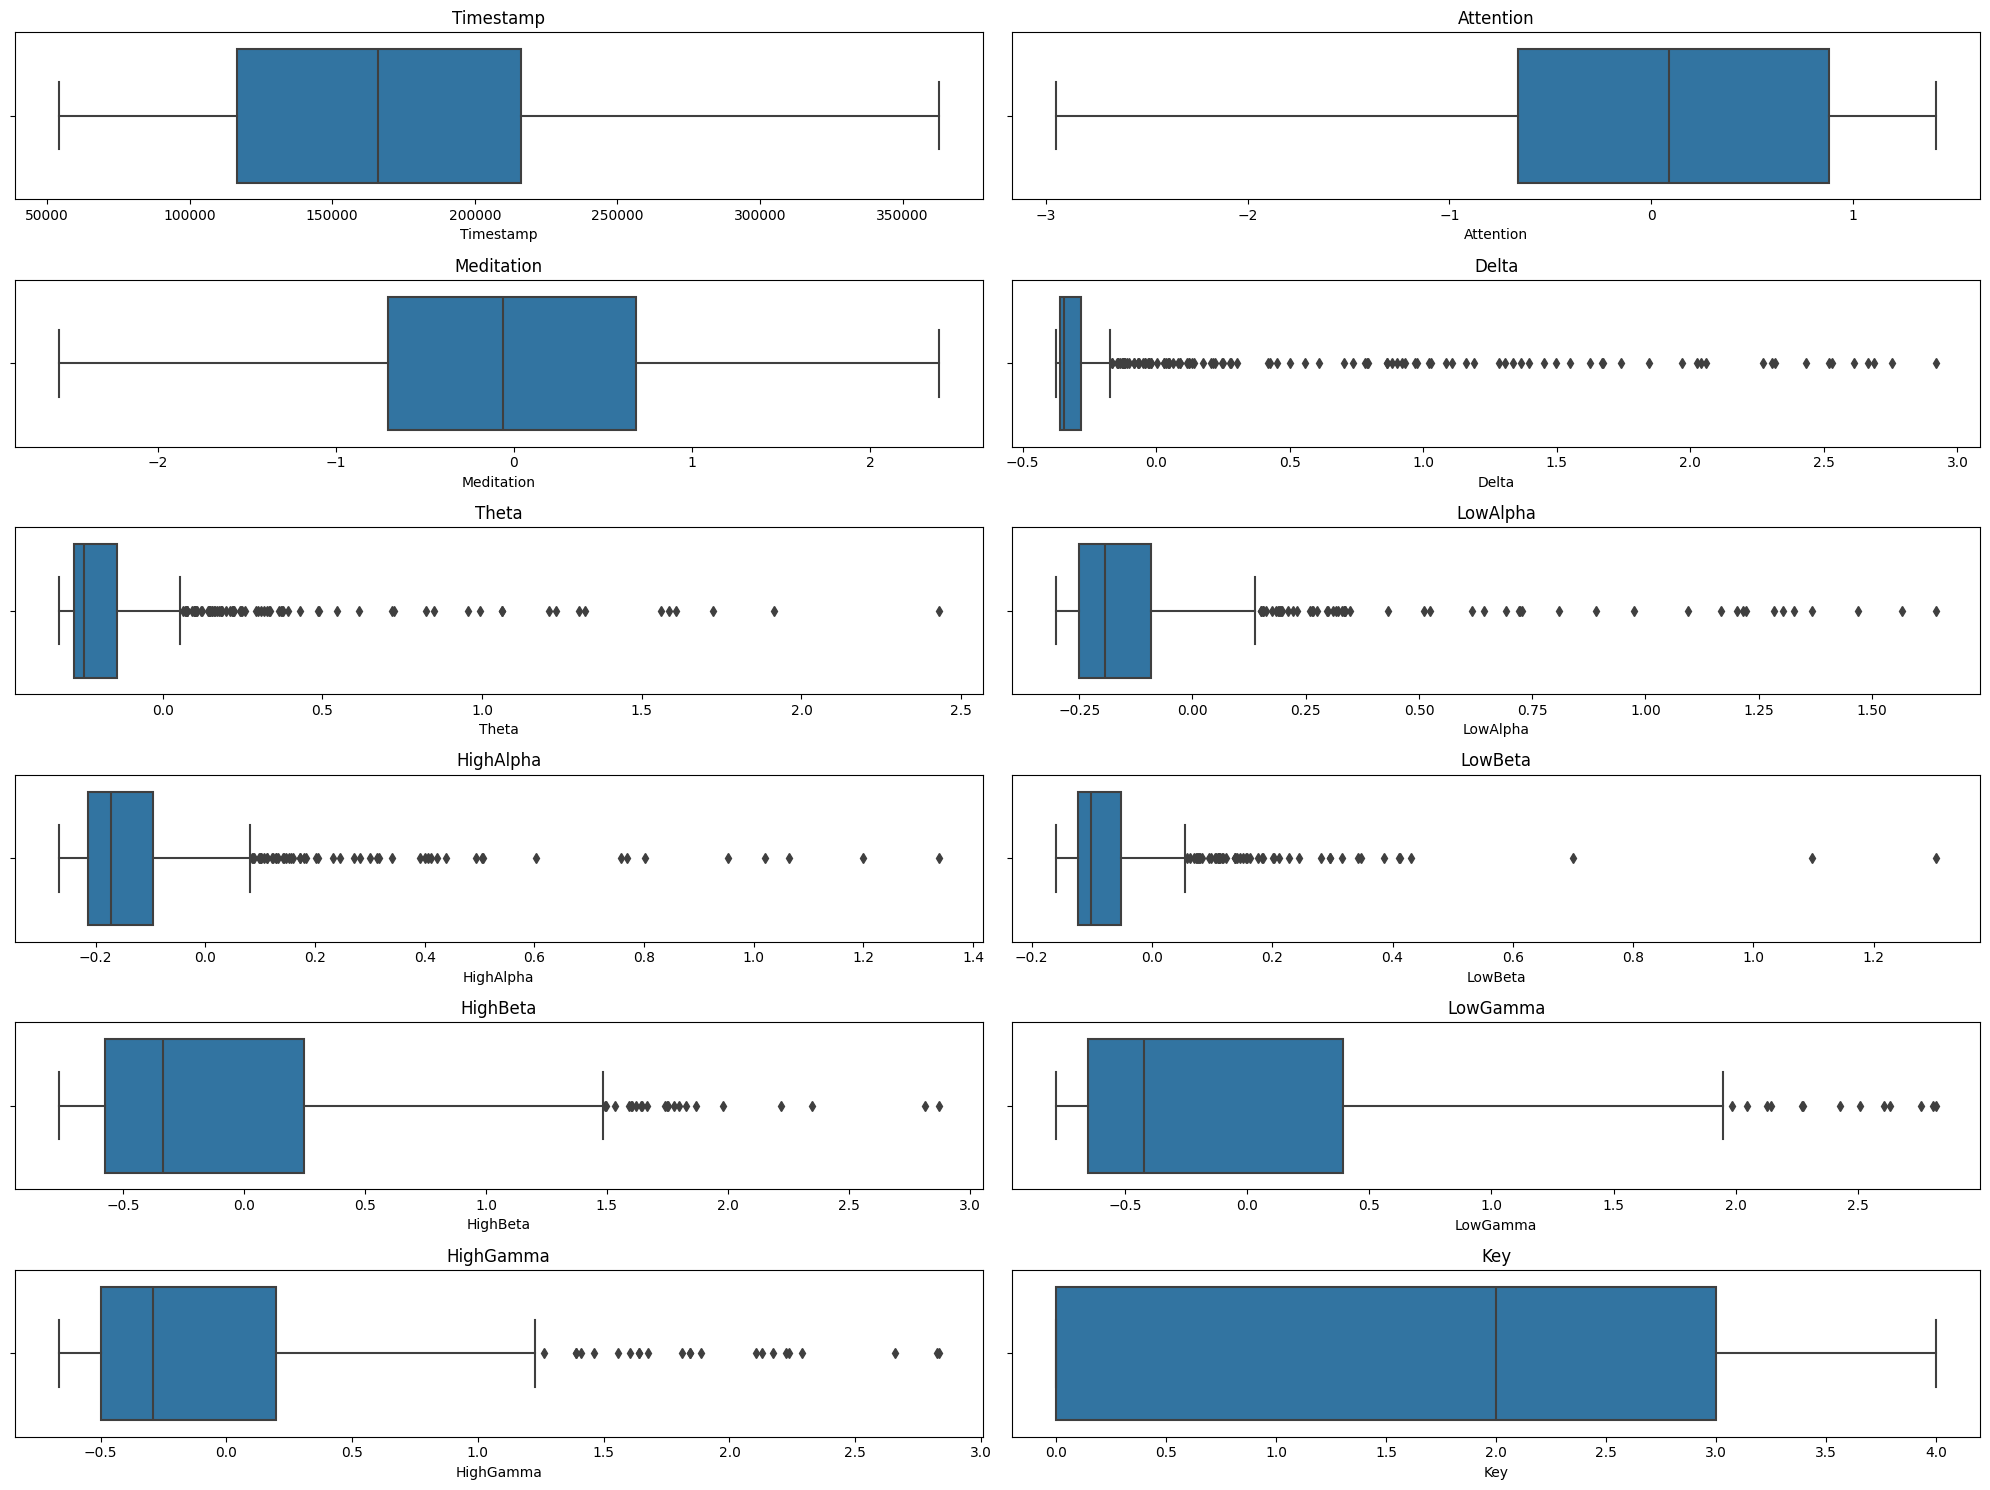

In [33]:
#https://seaborn.pydata.org/generated/seaborn.boxplot.html

display(HTML(html_h4('Analizo de que manera esta la distribución de datos en cuartiles dentro de cada caracterictica del conjunto de datos  ', 'purple')))

# Filtro el DataFrame para dejar fuera la columna Key
datosEEGTotal_csv_box1 = datosEEGTotal_nor_sinoutliers

# Calculo el número de filas necesarias para mostrar dos boxplots por fila para que la impresion no sea muy larga
num_cols = len(datosEEGTotal_csv_box1.columns)
num_rows = (num_cols) // 2

# Defino el tamaño de la figura
plt.figure(figsize=(20, 15))

# Itero sobre cada columna del DataFrame filtrado
for i, column in enumerate(datosEEGTotal_csv_box1.columns):
    # Creo un subplot para cada columna
    plt.subplot(num_rows, 2, i + 1)
    
    # un boxplot para cada columna
    sns.boxplot(data=datosEEGTotal_csv_box1, x=column)
    
    # título como el nombre de la columna
    plt.title(column)

# Ajusto el diseño para evitar superposiciones
plt.tight_layout()


In [34]:
display(HTML(html_h5('La distancia de los datos es mucho menor que en la fase de Carga de datos.  ', 'blue')))

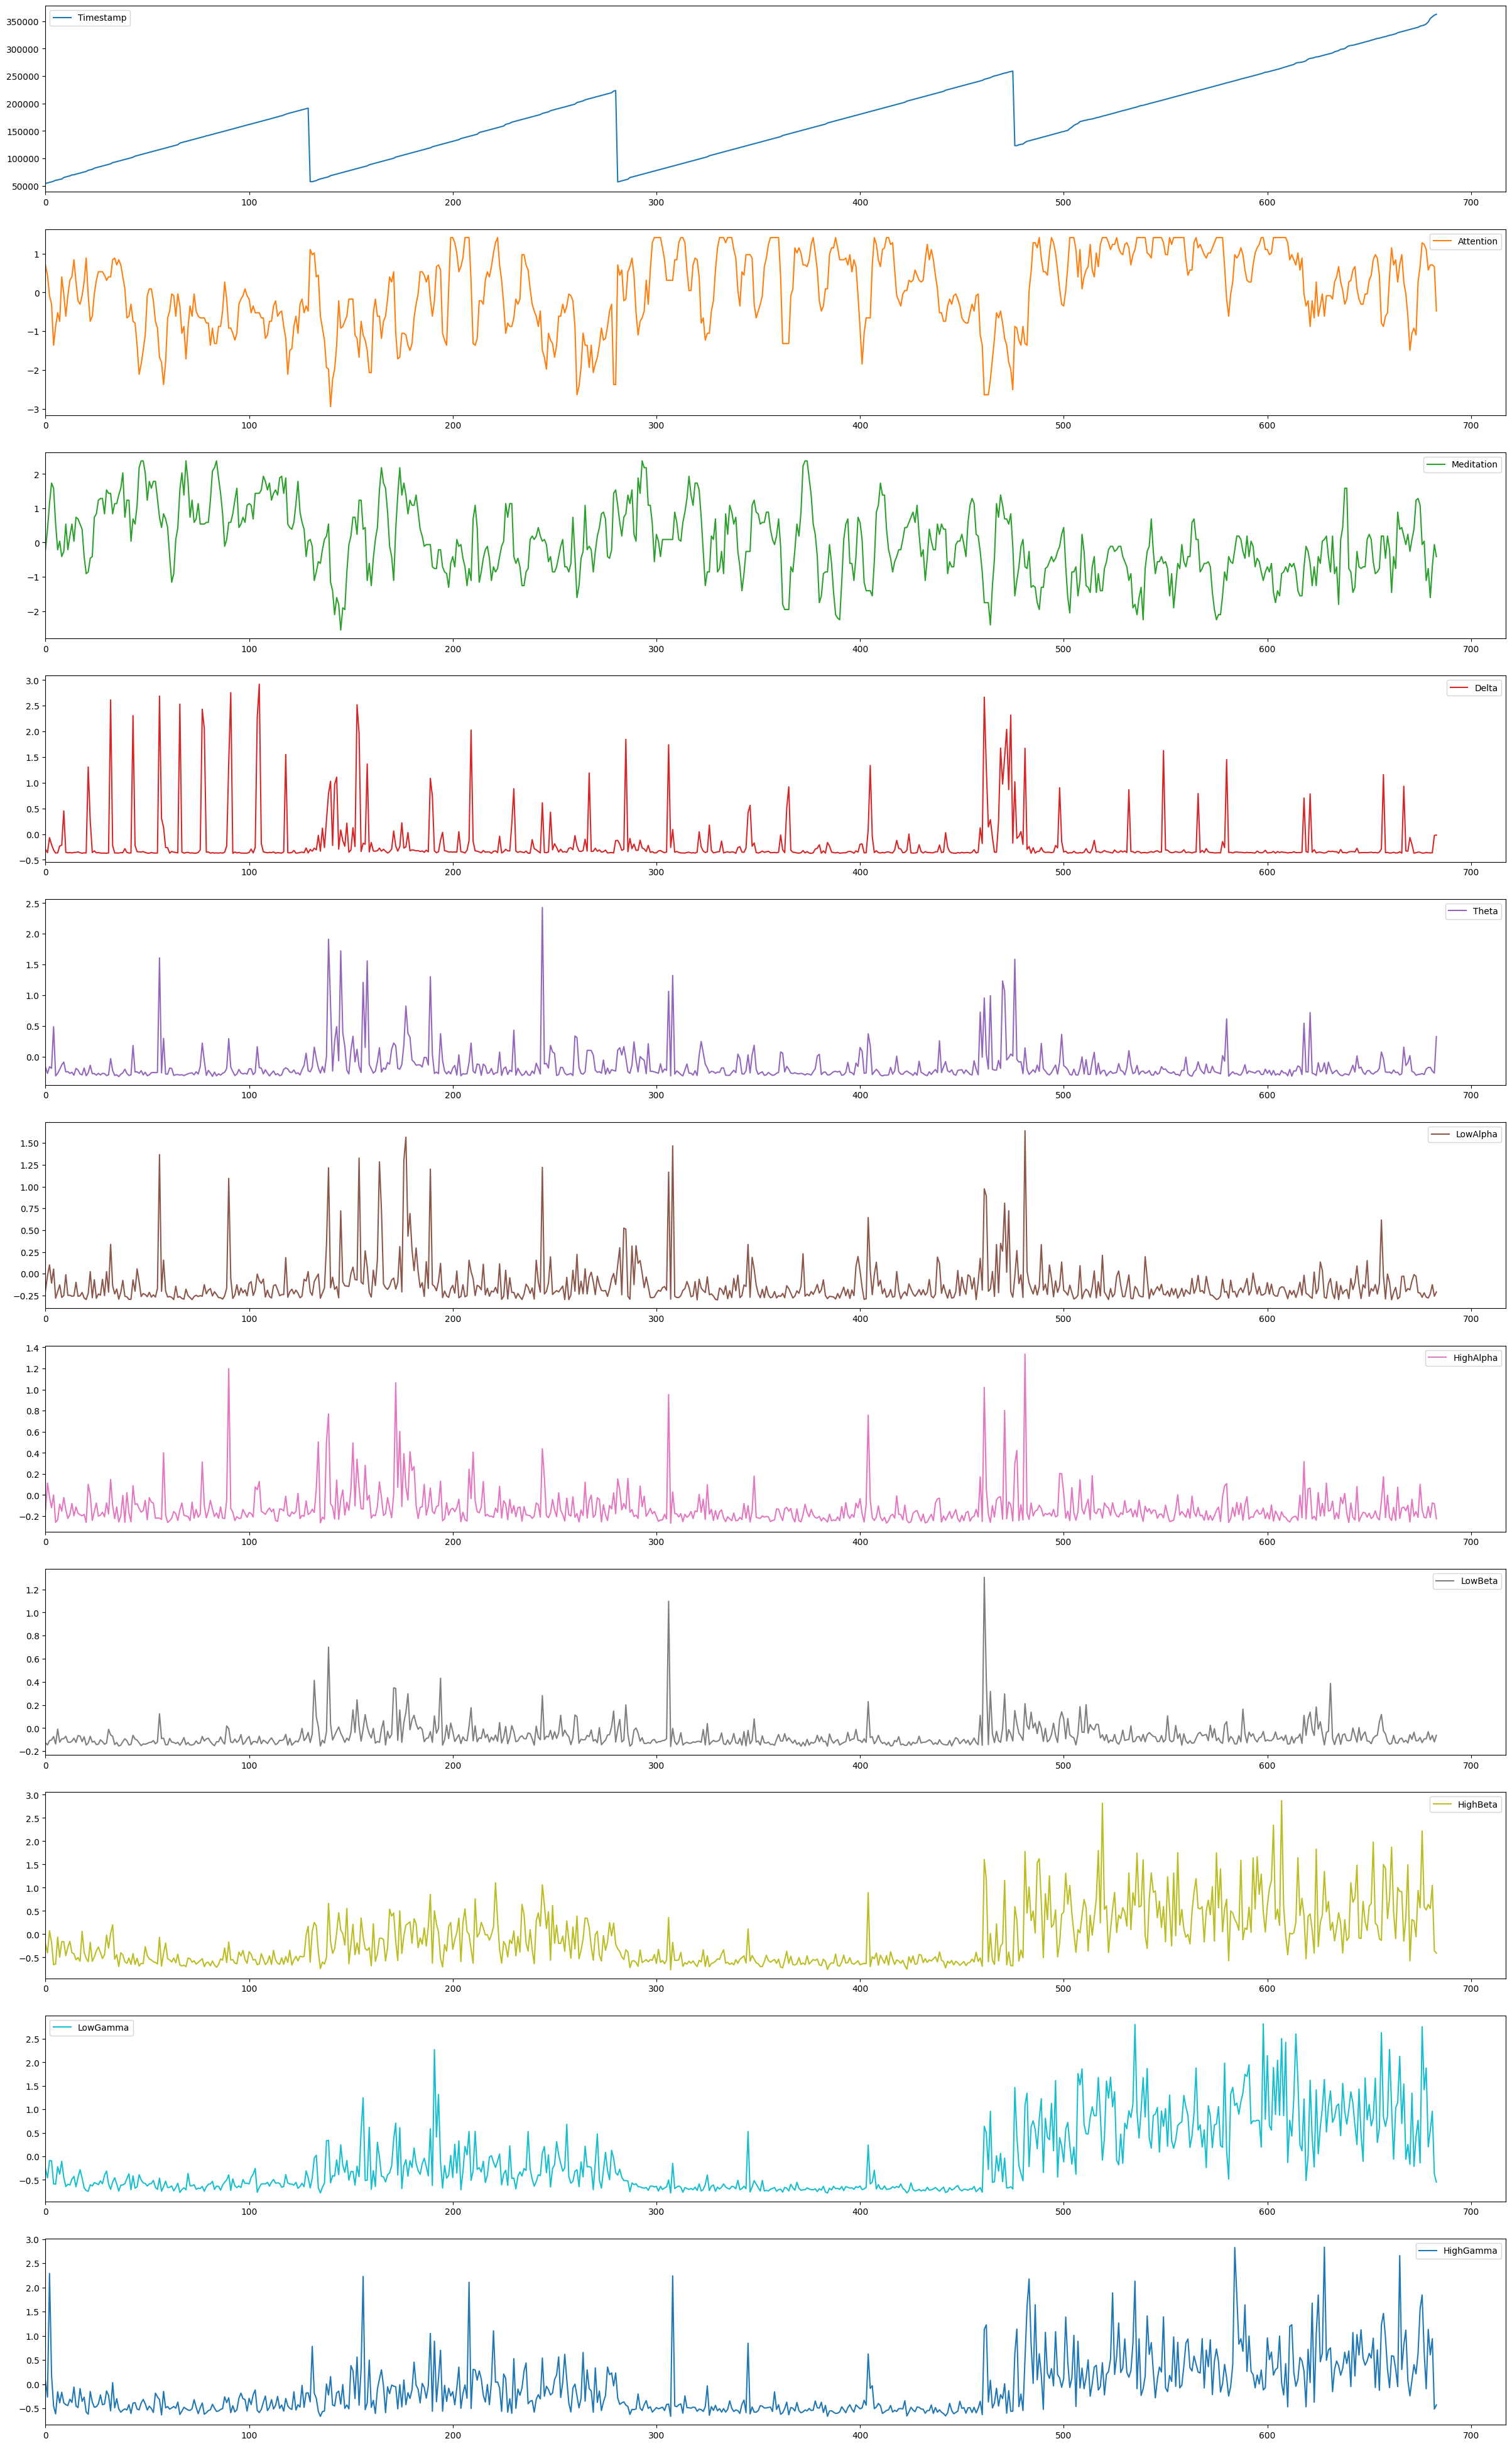

In [35]:
display()
display(HTML(html_h4('Imprimo cada una de las caracteristicas de los datos excepto Key: ', 'purple')))

#imprimo los datos por cada columna excluyendo Key
datosEEGTotal_nor_sinoutliers.drop(['Key'],axis=1).plot(kind="line",subplots=True,sharex=False, figsize=(30,50),xlim=0)
plt.show()

display(HTML(html_h5('Las graficas se observan mas limpias y se pueden observar como oscilan los datos, no como en Carga de datos: ', 'blue')))

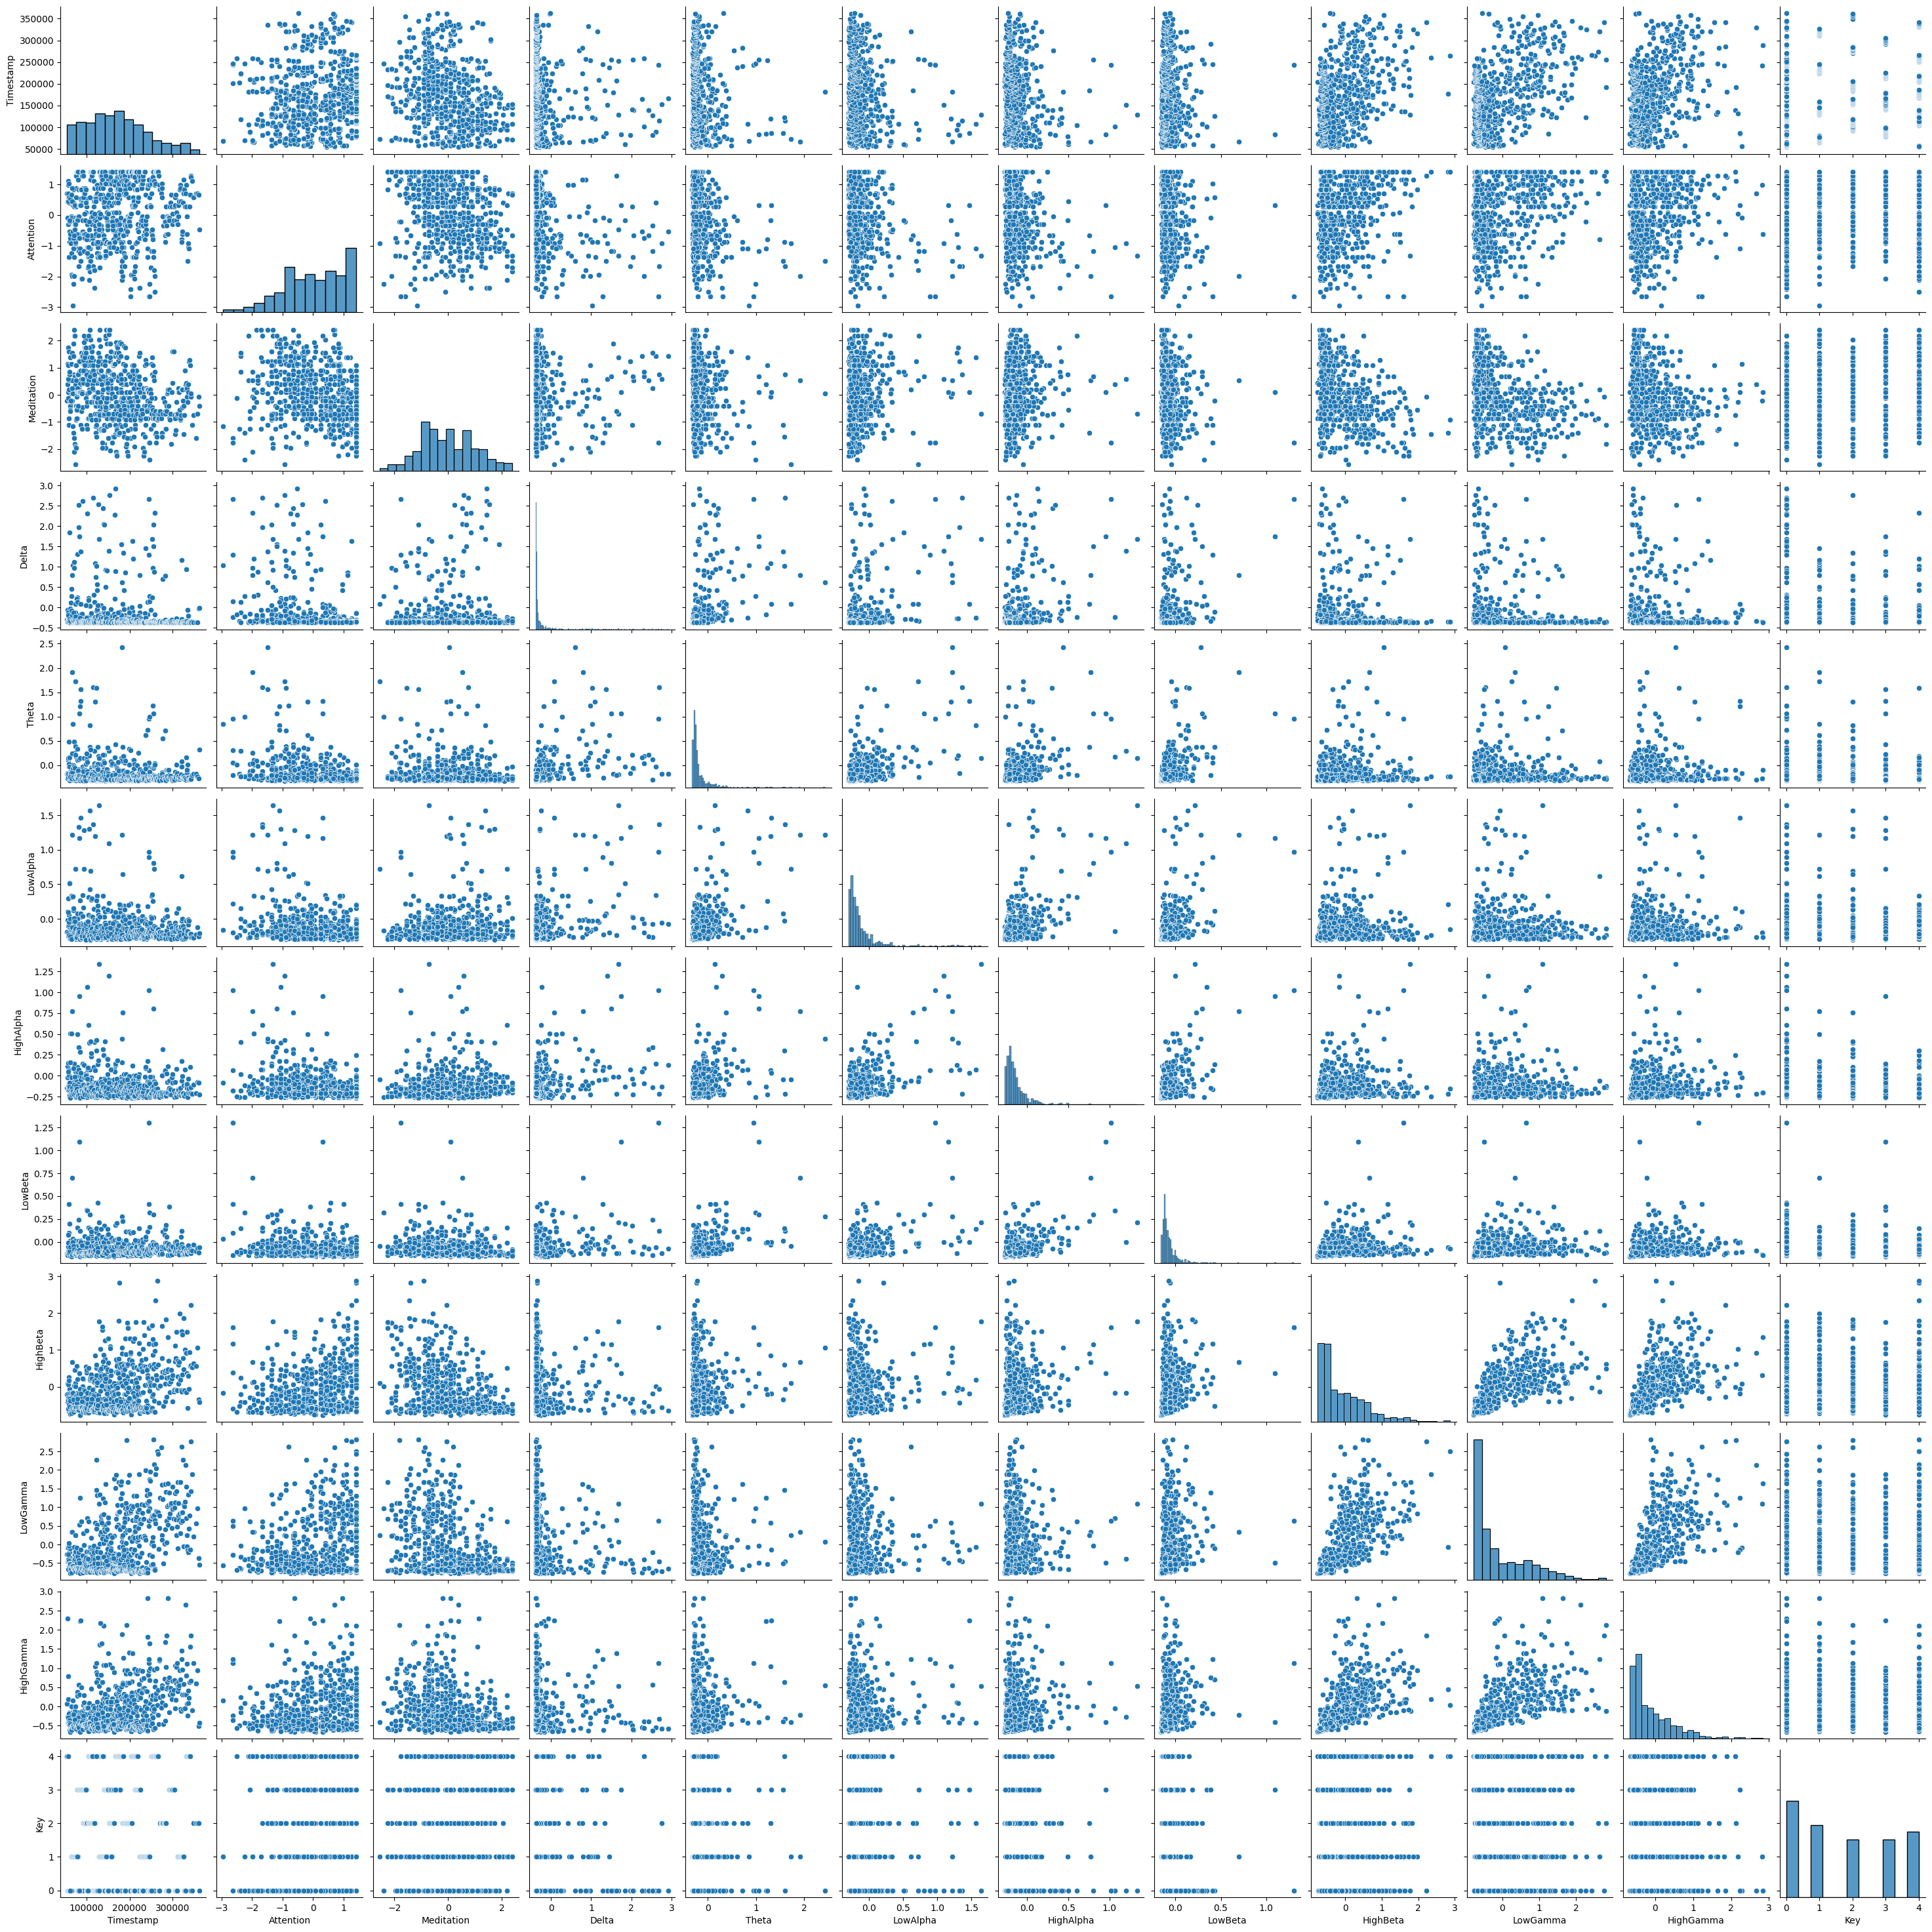

In [36]:
#https://www.codetodevs.com/correlacion-variables-pairplot-seaborn/
display(HTML(html_h4('Muestro los graficos de dispersión de los datos despues de limpieza y normalizacion de datos', 'purple')))

sns.pairplot(datosEEGTotal_nor_sinoutliers)

In [37]:
display(HTML(html_h4('Divido el conjunto de datos en los 4 experimentos que se podian ver en la fase de Carga de datos y en las graficas de Timestamp ', 'purple')))
display(HTML(html_h4('Estos cuatro experimentos los exportare a csv con nombres correlativos por TimeStamp experimento_1.csv, experimento_2.csv, ... ', 'purple')))


last_timestamp = None

file_counter = 1

df_segment = pd.DataFrame(columns=datosEEGTotal_nor_sinoutliers.columns)

# Itera sobre el DataFrame
for index, row in datosEEGTotal_nor_sinoutliers.iterrows():
    current_timestamp = row['Timestamp']
    
    # Si es el primer registro o si el timestamp actual es menor al anterior, crea un nuevo DataFrame y guarda el segmento anterior en un archivo
    if last_timestamp is None or current_timestamp < last_timestamp:
        if last_timestamp is not None:
            # Guarda el DataFrame anterior en un archivo
            df_segment.to_csv(f'../datos/experimento_stscaler_{file_counter}.csv', index=False)
            file_counter += 1
        
        # Inicializa un nuevo DataFrame para el nuevo segmento
        df_segment = pd.DataFrame(columns=datosEEGTotal_nor_sinoutliers.columns)
    
    # Añade la fila actual al DataFrame del segmento actual
    df_segment = pd.concat([df_segment, row.to_frame().T])

    # Actualiza el timestamp anterior
    last_timestamp = current_timestamp

# Guarda el último segmento en un archivo
if not df_segment.empty:
    df_segment.to_csv(f'../datos/experimento_stscaler_{file_counter}.csv', index=False)

In [38]:
datosEEGTotal_nor_sinoutliers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 684 entries, 0 to 683
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Timestamp   684 non-null    int64  
 1   Attention   684 non-null    float64
 2   Meditation  684 non-null    float64
 3   Delta       684 non-null    float64
 4   Theta       684 non-null    float64
 5   LowAlpha    684 non-null    float64
 6   HighAlpha   684 non-null    float64
 7   LowBeta     684 non-null    float64
 8   HighBeta    684 non-null    float64
 9   LowGamma    684 non-null    float64
 10  HighGamma   684 non-null    float64
 11  Key         684 non-null    float64
dtypes: float64(11), int64(1)
memory usage: 64.3 KB


In [39]:
display(HTML(html_h4('Tambien exportare a csv todos los datos del conjunto de datos sin TimeStamp con nombre experimento_all.csv ', 'purple')))
datosEEGTotal_nor_all = datosEEGTotal_nor_sinoutliers.drop(['Timestamp'], axis=1)


datosEEGTotal_nor_all.to_csv(f'../datos/experimento_stscaler_all.csv', index=False)